# Aproximación de enlace fuerte

Autor: Eilin Luna Moreno  
Fecha: 20/Agosto/2019

Siempre pretendemos resolver

$$ \hat{H} | \psi \rangle = E | \psi \rangle $$

La función de onda la escribimos como una combinación de orbitales atómicos para el carbono, $s_p^3$, $s$. $p_x$, $p_y$, $p_z$.

$$ \psi = \sum_{i=1}^{n} c_i \phi (\vec{r} - R_i) $$

donde n es el número de átomos que tengo,

$$ \sum_{i}^{n} c_i \hat{H} \phi ( \vec{r} - \vec{R}_i) = E \sum_{i=1}^{n} c_i \phi_i (\vec{r} - \vec{R}_i) $$

Multiplicamos a izquierda por $\phi^{*} (\vec{r} - \vec{R}_j)$ e integramos en todo el espacio:

$$ \sum_{i=1}^{n} c_i \int \phi^{*}_j(\vec{r}-\vec{R}_j)  \hat{H} \phi(\vec{r}-\vec{R}_i) d\vec{r} = E \sum_{i=1}^{n} c_i \int \phi^{*} (\vec{r}-\vec{R}_j) \phi(\vec{r}-\vec{R}_i) d\vec{r}$$

Los orbitales atómicos son ortonormales entre sí

$$ \int \phi^{*} (\vec{r} - \vec{R}_j) \phi((\vec{r} - \vec{R}_j) d\vec{r} = \delta_{ij}$$

$$ \sum_{i=1} c_i \int \phi^{*} (\vec{r} - \vec{R}_j) \hat{H} \phi(\vec{r} - \vec{R}_i) d\vec{r} = E c_j $$

Aoproximación:

1 a primeros vecinos:

$$ C_1 t + C_5 t = E C_0 $$
$$ C_0 t + C_2 t = E C_1 $$
$$ C_1 t + C_3 t = E C_2 $$
$$ C_2 t + C_4 t = E C_3 $$
$$ C_3 t + C_5 t = E C_4 $$
$$ C_0 t + C_4 t = E C_5 $$

$$ \left( \begin{matrix}
0 && t && 0 && 0 && 0 && t \\
t && 0 && t && 0 && 0 && 0 \\
0 && t && 0 && t && 0 && 0 \\
0 && 0 && t && 0 && t && 0 \\
0 && 0 && 0 && t && 0 && t \\
t && 0 && 0 && 0 && t && 0 \\
\end{matrix}  \right) \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) = E \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) $$


Los valores de t, los podemos determinar desde experimentos desde otros cálculos. Dado el valor de t determinar E.

t = -2.8

In [1]:
# Importando paquetes
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funcion que lee un archivo y genera un vector de atomos: 'C'=1
# y coordenadas.
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom, coords = [], []
    for line in lines[2:]:
        A, x, y, z= line.split()
        coords.append([x,y,z])
        if A == 'C': A = 1
        else: A = 0
        atom.append(A)
    coords = np.array(coords, dtype=float)
    file.close()
    return np.array(atom),coords

# Generando matriz de distancias entre los Carbonos.
def getMatrizDistancias(atom,coords, r=False):
    C = pd.DataFrame(coords, columns=['x', 'y', 'z'], index=atom)
    Cs = C[C.index==1] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    if r==True: return np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2), Z2-Z1
    return np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2)

# Funcion que obtiene la matriz T.
def getT(t, atom,coords):
    D = getMatrizDistancias(atom, coords)
    np.fill_diagonal(D, 1000)
    D[abs(D-1.44)>0.5]=0.
    D[D>0.]=t
    return np.array(D)

# Funcion que obtiene la matriz H.
def getH(t, gamma, Beta, atom, coords):
    D, r = getMatrizDistancias(atom, coords, r=True)
    H = np.zeros((len(coords), len(coords)))
    np.fill_diagonal(D, 1000)
    H[(abs(r)<1e-2)&(abs(D-1.44)<1e-2)]=t
    H[abs(r)>3.] = gamma*np.exp(-Beta*abs(D[abs(r)>3.]-3.3))
    return H

# Funcion que rota x y y.
def rotacion(x,y, ang):
    A = [[np.cos(ang), -np.sin(ang)],
         [np.sin(ang), np.cos(ang)]]
    r = [x,y]
    return np.dot(A,r)

# Funcion que genera un punto cuantico triangular 
# Funcion que genera un punto cuantico triangular 
# de tamaño n.
def coordsTriangularGraphene(n, d=0.0, ang=0.0):
    acc=1.44
    coords=[]
    for j in range(n+1):
        for i in range(-j,j+2,2):
            x,y=i*np.sqrt(3)/2*acc, (1.5*j - 0.75*n - 1.25)*acc
            coords.append((x,y,d))
            x,y=i*np.sqrt(3)/2*acc, (1.5*j - 0.75*n - 0.25)*acc
            coords.append((x,y,d))
            if j==(n) and i!=(n):
                x,y=(i+1)*np.sqrt(3)/2*acc, (1.5*j - 0.75*n + 0.25)*acc
                coords.append((x,y,d))
    coords.pop(0)
    # Aplicando rotación
    x, y, z = np.transpose(coords)
    x1, y1 = rotacion(x,y, ang)
    return np.transpose([x1, y1, z])

def coords_vecinos(coords):
    # Generando energias.
    t = -2.8
    atom = np.ones(len(coords)) #Etiquetas
    T = getT(t, atom, coords)
    m,p = T.shape
    # Extrayendo carbonos con dos vecinos.
    bordes=[]
    for i in range(m):
        Nvecinos = list(T[i]).count(t)
        if Nvecinos==2:
            bordes+=[coords[i]]
    return bordes
    
def coords_Hydrogens(coords, ang=0.0, acc=1.44):
    x,y,z=np.transpose(coords)
    x,y=rotacion(x,y,-ang)
    bordes = coords_vecinos(np.transpose([x,y,z]))
    x, y, z = np.transpose(bordes)
    Nb = len(bordes)
    n = (Nb/3)-1
    #------------------------------------
    y[0]=y[0]-acc # vértice.
    #------------------------------------
    r=Nb-n-3 # aristas.
    s=np.sign(x[1:r+1])
    x[1:r+1]=x[1:r+1]+np.sqrt(3)/2*acc*s
    y[1:r]=y[1:r]-0.5*acc
    y[r]=y[r]+0.5*acc
    #------------------------------------
    r = Nb-n-2 # vértice
    y[r:Nb-2]=y[r:Nb-2]+acc
    #------------------------------------
    r=Nb-1 # vértice
    x[r]=x[r]+np.sqrt(3)/2*acc
    y[r]=y[r]+0.5*acc
    #------------------------------------
    r=Nb-2 # vértice
    x[r] = x[r] + np.sqrt(3)/2*acc
    y[r] = y[r] -0.5*acc
    #------------------------------------
    x, y = rotacion(x,y, ang)
    return np.transpose([x,y,z])

# Charge Density
def ChargeDensity(coords,eigvec):
    nC = len(coords[atom==1]) # Num Carbonos
    N = nC//2 # Num de ocupacion
    P = np.zeros((nC,nC))
    for t in range(nC):
        for u in range(nC):
            suma = 0.
            for i in range(N):
                suma += eigvec[i][t]*eigvec[i][u]
            P[t,u] = 2*suma
    print("#Carbonos=%f"%(nC))
    print("Sum(Diag(P))=%f"%np.sum(np.diag(P)))
    return P

# Reune las coordenadas de Carbonos e Hidrógenos.
def TriangularGraphene(n, d=0.0, ang=0.0):
    coordsC = coordsTriangularGraphene(n, d, ang)
    coordsH = coords_Hydrogens(coordsC, ang)
    
    atomC = np.ones(len(coordsC))
    atomH = np.zeros(len(coordsH))
    
    coords = list(coordsC) + list(coordsH)
    atom = list(atomC) + list(atomH)
    return np.array(atom), np.array(coords)

# Escribe archivo de coordenadas.
def write_coords(atom, coords, filename):
    x, y, z = np.transpose(coords)
    f = open(filename, "w")
    f.write(str(len(coords))+"\n")
    f.write("XYZ"+"\n")
    for i in range(len(coords)):
        if atom[i]==1: a="C"
        else: a="H"
        f.write( a+"\t"
                  +str(x[i])+"\t"
                  +str(y[i])+"\t"
                  +str(z[i])+"\n")
    f.close()
    return 

# 1. Benceno
+ Cálculo de energías a partir de las coordenadas en un archivo.

In [3]:
# Genera coordenadas
n=5
atom, coords = readfile("benzene.xyz")
x,y,z=np.transpose(coords)

# Genera energias
t = -2.8
T = getT(t, atom, coords)
E, eigvec = np.linalg.eigh(T)

# Escribe archivo de coordenadas.
C = write_coords(atom, coords, "coordenadas.xyz")

# Charge Density
P = ChargeDensity(coords, eigvec)

#Carbonos=6.000000
Sum(Diag(P))=6.000000


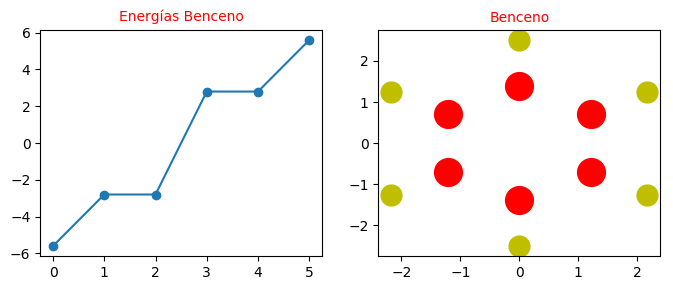

In [4]:
# Grafica.
#-------------------------------------------------------------------------
fig,(ax1,ax2) = plt.subplots(figsize=(8,3), dpi=100, ncols=2)
ax1.set_title(u"Energías Benceno", fontsize=10, color='r')
ax2.set_title(u"Benceno", fontsize=10, color='r')
ax1.plot(E, 'o-')
ax2.plot(x[atom==1.],y[atom==1.], 'or', ms=20)
ax2.plot(x[atom!=1.],y[atom!=1.], 'oy', ms=15)
plt.show()

# 2. Punto cuántico triangular (n=5)
+ Cálculo de energías a partir de las coordenadas en un punto cuántico triangular (n).

In [5]:
# Genera coordenadas
n=5
atom, coords = TriangularGraphene(n)
x, y, z = np.transpose(coords)

# Genera energias
t = -2.8
T = getT(t, atom, coords)
E, eigvec = np.linalg.eigh(T)

# Escribe archivo de coordenadas.
C = write_coords(atom, coords, "coordenadas.xyz")

# Charge Density
P = ChargeDensity(coords, eigvec)

#Carbonos=46.000000
Sum(Diag(P))=46.000000


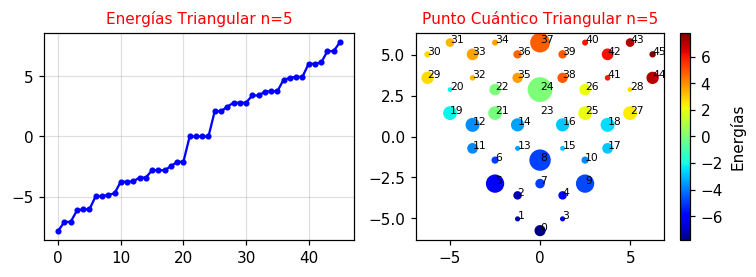

In [6]:
# Grafica.
#-------------------------------------------------------------------------
eig = 25
fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=110, ncols=2)
ax1.set_title(u"Energías Triangular n="+str(n), fontsize=10, color='r')
ax2.set_title(u"Punto Cuántico Triangular n="+str(n), fontsize=10, color='r')
ax1.plot(E, 'b.-')
Factor = np.array([eigvec[i][eig]*eigvec[i][eig] for i in range(len(E))])
C = ax2.scatter(x[atom==1], y[atom==1], s=Factor*2000, c=E, cmap='jet')
ax1.grid(alpha=0.4)
cbar = fig.colorbar(C)
cbar.set_label(u"Energías")
[ax2.text(x[i], y[i], str(i), fontsize=7) for i in range(len(x[atom==1]))]
plt.show()

# 3. Punto cuántico triangular (n=1,2,...,20)
+ Cálculo de energías a partir de las coordenadas en vatios puntos cuánticos triangulares (diferentes n).

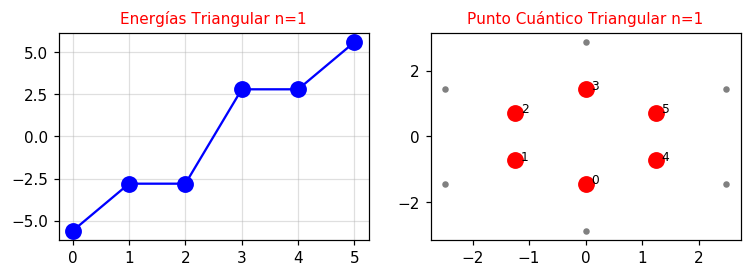

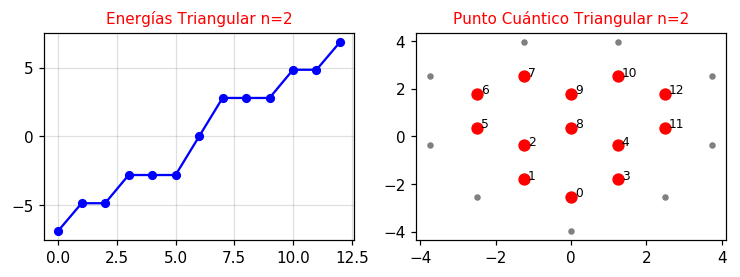

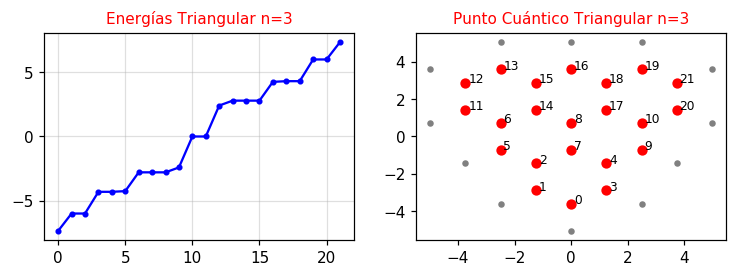

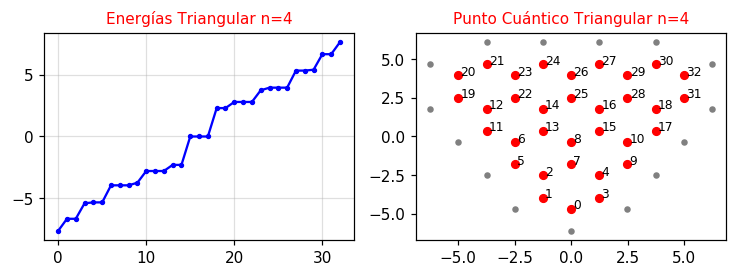

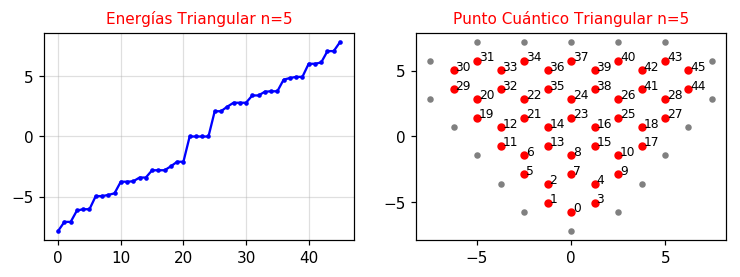

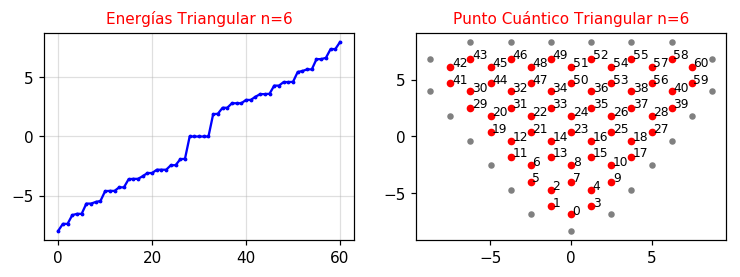

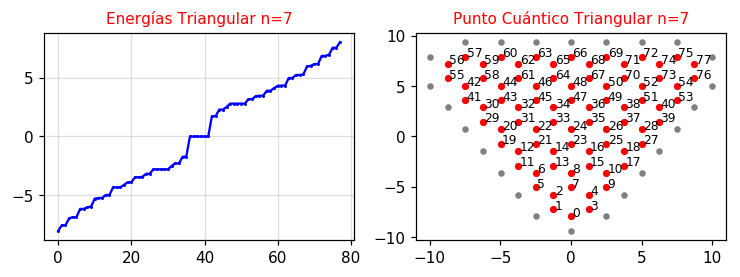

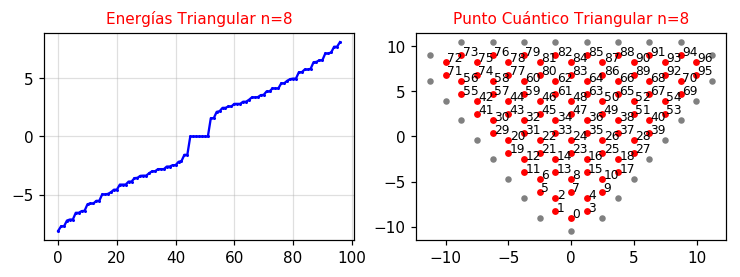

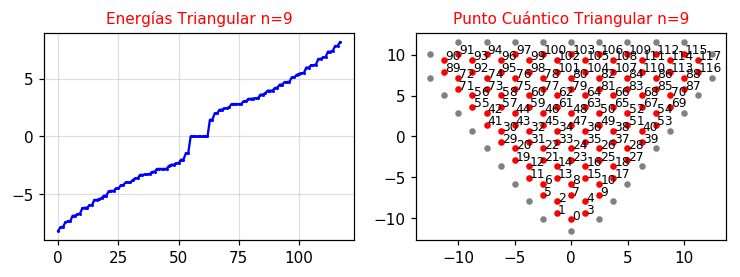

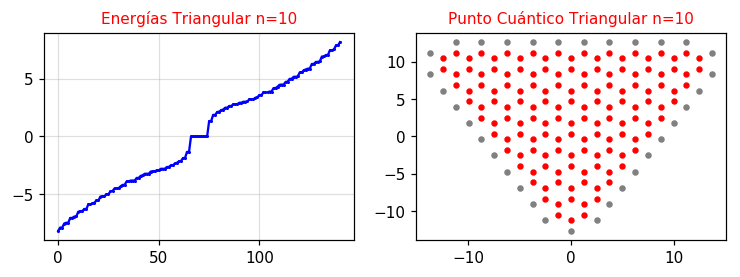

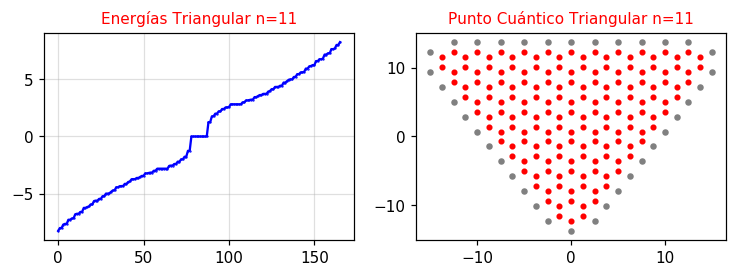

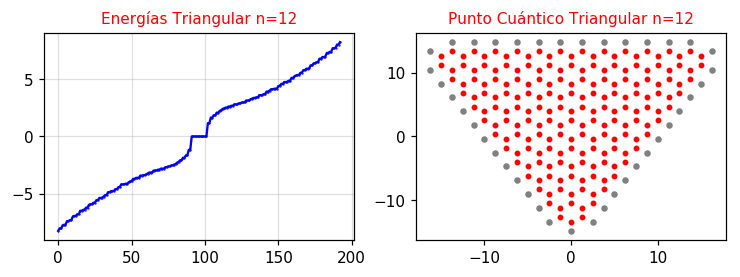

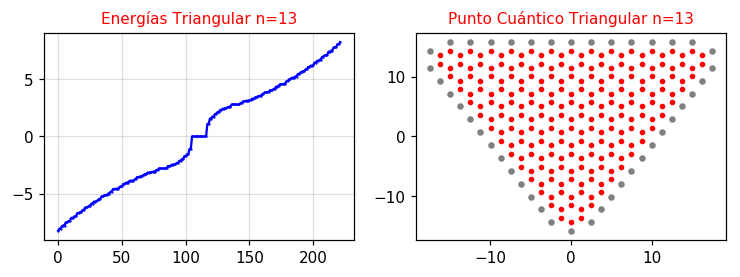

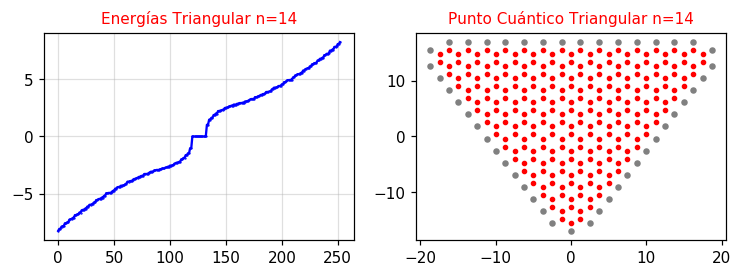

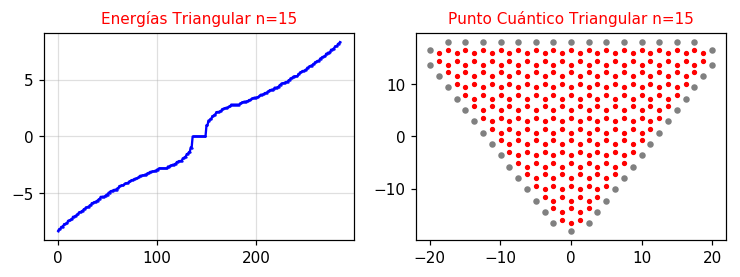

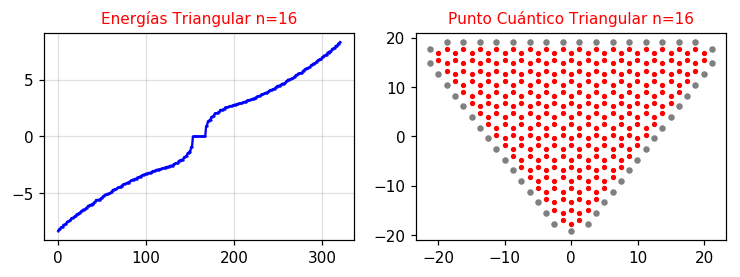

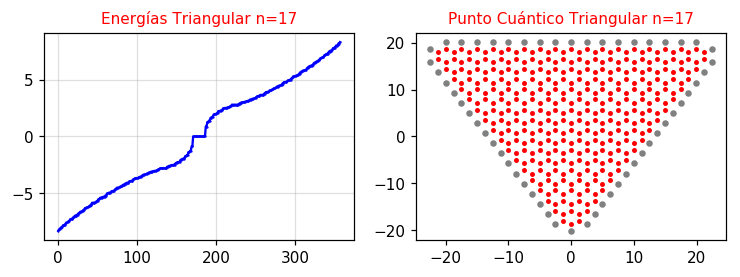

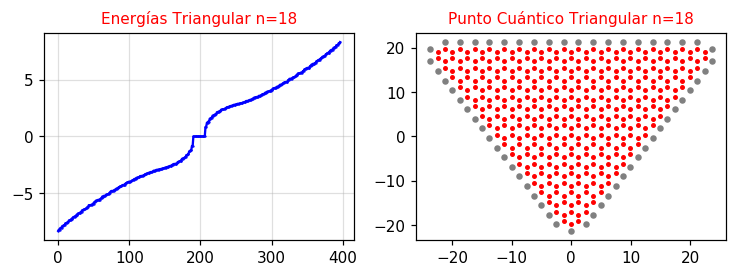

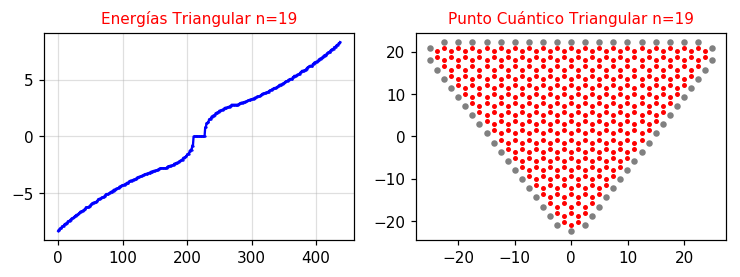

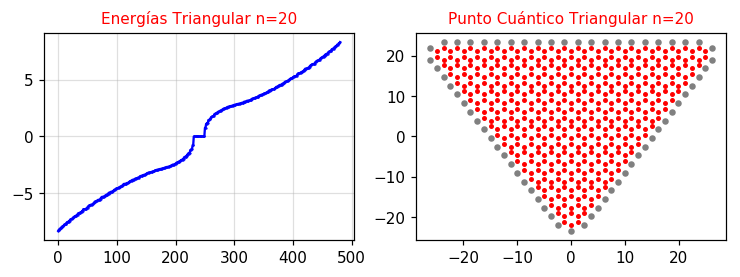

In [7]:
import matplotlib.pyplot as plt

t = -2.8
for i in range(1,21):
    atom, coords = TriangularGraphene(i)
    x, y, z = np.transpose(coords)
    
    T = getT(t, atom, coords)
    E, eigvec = np.linalg.eigh(T)
    E= np.sort(E)

    # Grafica.
    #-------------------------------------------------------------------------
    fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=110, ncols=2)
    ax1.set_title(u"Energías Triangular n="+str(i), fontsize=10, color='r')
    ax2.set_title(u"Punto Cuántico Triangular n="+str(i), fontsize=10, color='r')
    ax1.plot(E, 'b.-', ms=20/i)
    ax2.plot(x[atom==0], y[atom==0], '.', c='gray', ms=7-0.1*n)
    x,y=x[atom==1],y[atom==1]
    C = ax2.scatter(x, y, c='r', cmap='jet', s=100/i)
    ax1.grid(alpha=0.4)
    if i<10: [ax2.text(x[i]+0.1, y[i], str(i), fontsize=9-0.2*n) for i in range(len(x))]
    plt.show()

# 4. Dos puntos cuánticos triangulares superpuestos.

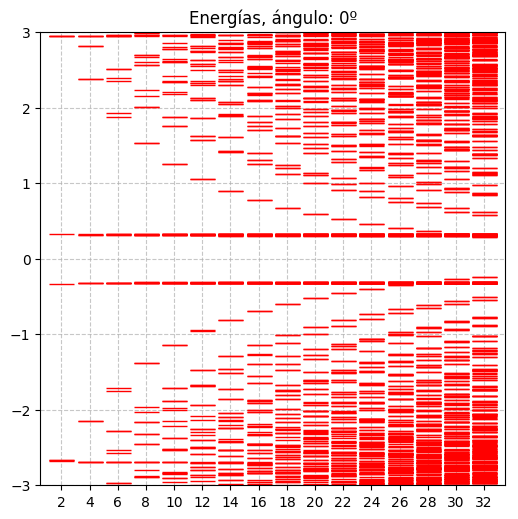

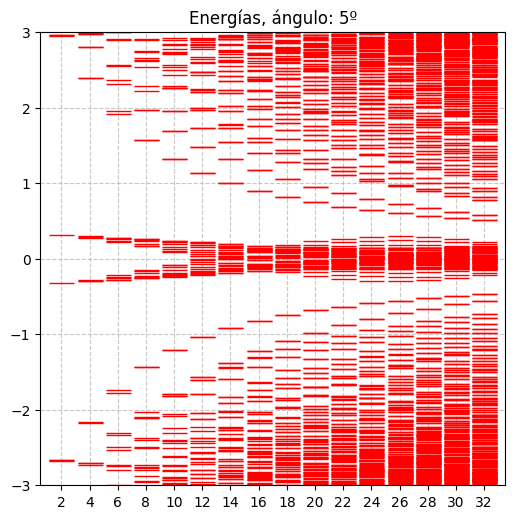

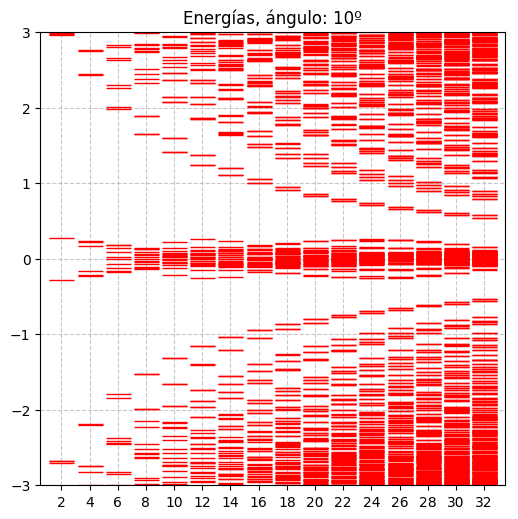

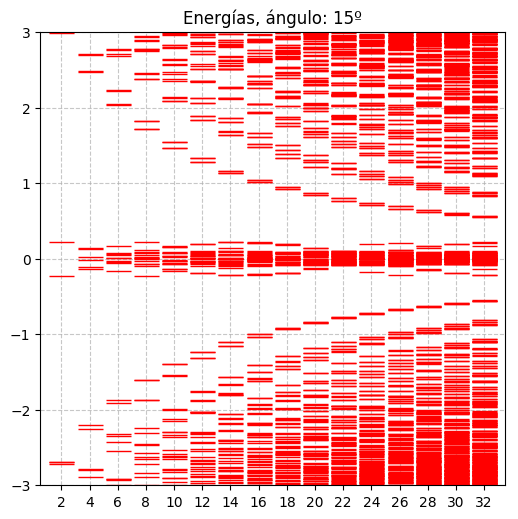

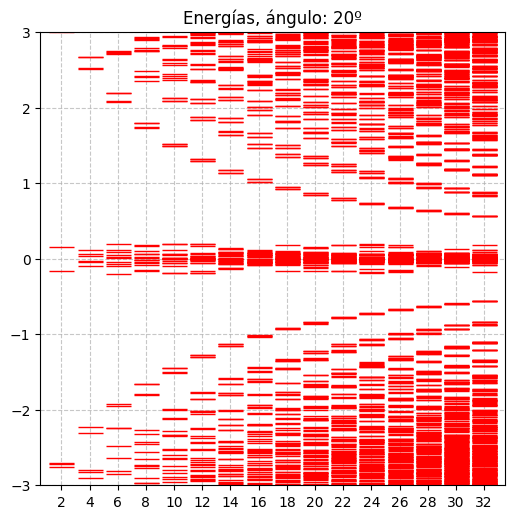

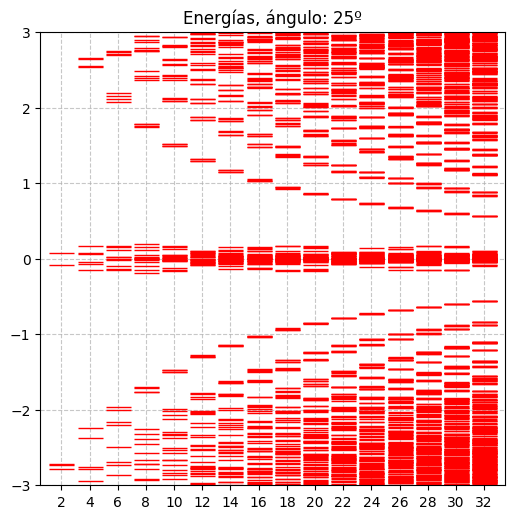

In [8]:
gamma = -0.39
Beta = 3.0
t = -3.16
for alpha in [0, 5, 10, 15, 20, 25]:
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.title(u"Energías, ángulo: "+str(alpha)+u"º")
    nn=34
    for n in range(2, nn, 2):
        atom1, coords1 = TriangularGraphene(n, d=0.0)
        atom2, coords2 = TriangularGraphene(n, d=3.3, ang=np.deg2rad(alpha))
        coords = np.array(list(coords1) + list(coords2))
        atom = np.array(list(atom1) + list(atom2))
        coords = coords[atom==1.]
        atom = atom[atom==1.]
        H=getH(t, gamma, Beta, atom, coords)
        E, eigvec = np.linalg.eigh(H)
        plt.plot(np.zeros(len(coords))+n, E, "_r", ms=18) #markeredgewidth=2.5)
        #plt.scatter(np.zeros(len(coords))+n, E, c=E/sum(E)*3, marker="_", cmap='jet', ms=10)
    plt.grid(alpha=0.7, ls='--')
    plt.xticks(range(2,nn,2))
    plt.ylim(-3,3)
    plt.show()
    
# Escribiendo coordenadas en un archivo.
atom, coords = list(TriangularGraphene(5, d=0.0))
write_coords(atom, coords, "tq5-5.xyz")

# 5. Vacantes

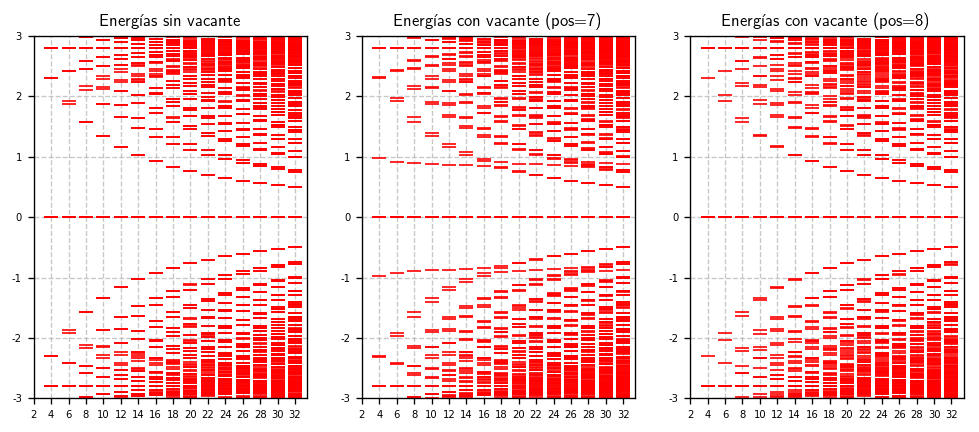

In [9]:
t = -2.8

# Energias para un benzeno sin vacante.
def Energias(n, vacante=False):
    atom, coords = TriangularGraphene(n)
    atom, coords = list(atom), list(coords)
    if vacante!=False:
        atom.pop(vacante)
        coords.pop(vacante)
    X, Y, Z = np.transpose(coords)
    H=getT(t, atom, coords)
    E, eigvec = np.linalg.eigh(H)
    return E, atom, coords

# Grafica --------------------------------------------------------------
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(10,4), dpi=120, ncols=3)
ax1.set_title(u'Energías sin vacante', fontsize=10, usetex=True)
ax2.set_title(u'Energías con vacante (pos=7)', fontsize=10, usetex=True)
ax3.set_title(u'Energías con vacante (pos=8)', fontsize=10, usetex=True)

nn=34
for n in range(4,nn,2):    
    # Sin vacante.
    E1, atom1, coords1 = Energias(n)
    ax1.plot(np.zeros(len(E1))+n, E1, "_r", ms=8)
    #write_coords(atom1, coords1, "sin_vacante"+str(n)+".xyz")
    
    # Con vacante pos (7)
    E2, atom2, coords2 = Energias(n, vacante=7)
    ax2.plot(np.zeros(len(E2))+n, E2, "_r", ms=8)
    #write_coords(atom2, coords2, "con_vacante_7-"+str(n)+".xyz")
    
    # Con vacante pos (8)
    E3, atom3, coords3 = Energias(n, vacante=8)
    ax3.plot(np.zeros(len(E3))+n, E3, "_r", ms=8)
    #write_coords(atom3, coords3, "con_vacante_8-"+str(n)+".xyz")

for ax in [ax1, ax2, ax3]:
    ax.grid(alpha=0.7, ls='--')
    ax.set_xticks(range(2,nn,2))
    ax.set_xticklabels(range(2,nn,2), fontsize=6)
    ax.set_ylim(-3,3)
    ax.set_yticks(range(-3,4))
    ax.set_yticklabels(range(-3,4), fontsize=6)

In [10]:
atom, coords = TriangularGraphene(10)
write_coords(atom, coords, "tq5-5.xyz")